In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Namespace:  Local vs Global "Scope" (범위)
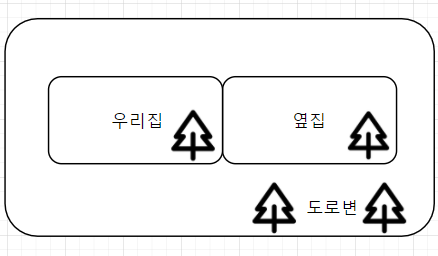
- 원래는 상위에서 지정한 것이 아래로 내려올 수 있으나, 하위에서 지정한 것은 위로 올라갈 수 없다. 그러나 namespace를 이용하면 역이 가능하다.
1. Local Variable: 함수 내부에 존재하는 변수
- 사용자정의함수 외부로 나갈 수 없다. - 내부에서만 사용 가능
- 내부의 함수를 외부에서 끌어다 쓰면 Error가 발생한다.
2. Global Variable(전역 변수): 함수 외부에 존재하는 변수
- 함수 내부로 들어갈 수 있다.
- Global를 선언하면 어디서든 사용이 가능하다.
- Global Scope는 모든 함수에 들어갈 수 있다.
- 항상 불변하게 적용되는 값들만 Global Scope로 지정한다.
- 어디든 적용이 되기 때문에 주의해야 한다.
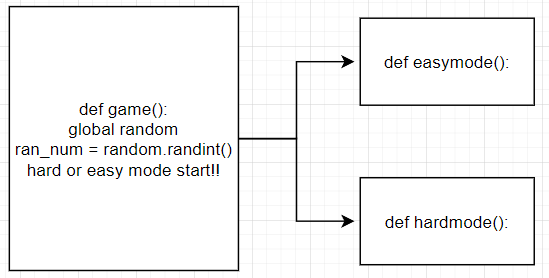
- Global Scope은 동일 혹은 하위의 변수를 동일 혹은 상위 부분에서 사용하기 위해 지정한다.  
  ex) game() 함수에서 지정한 ran_num(번호)를 동일한 hardmode() 그리고 easymode()에 넣으려면 global를 지정하여야 불필요하게 hardmode() 
  혹은 easymode()를 실행할 때 ran_num를 따로 지정하지 않아도 된다.

In [4]:
나쁜놈 = 1 # Global variable: 외부에 존재하는 변수. 함수 안으로도 들어갈 수 있다.
def increase_enemies(): # 사용자정의함수 안에서 일어나는 일은 외부로 나갈 수 없다.
    나쁜놈 = 3 # Local Variable: 함수 안에서만 존재하는 변수
    print(f"적 {나쁜놈}명과 마주쳤다.")

increase_enemies() # 함수 안에서의 나쁜놈이 적용되었다.
print()
print(f"적 {나쁜놈}명과 마주쳤다.") # 함수가 실행되지 않았기 때문에 외부의 나쁜놈이 적용되었다.

적 3명과 마주쳤다.

적 1명과 마주쳤다.


In [5]:
# Global Scope => Global Variable (전역 변수)
def increase_enemies():
    global 나쁜놈
    나쁜놈 = 3
    print(f"적 {나쁜놈}명과 마주쳤다.")

increase_enemies()
print()
print(f"적 {나쁜놈}명과 마주쳤다.")

적 3명과 마주쳤다.

적 3명과 마주쳤다.


In [7]:
# my()가 실행된 이후에 no가 프린트되기 때문에 global no가 프린트될 것이다.
no = 1
def my():
    global no 
    no =3
    print(no)
my()
print(no)

# global no 지정 이후에 no가 다시 선언되었기 때문에 아래 no = 1로 프린트 될 것이다.
def my():
    global no 
    no =3
    print(no)
my()
no = 1
print(no)

3
3
3
1


실습1) 숫자 맞추기 게임  
- 사용자가 말하면 Up/Down을 말해준다.
- 숫자는 1~99 사이의 정수로 한다.
- 사용자가 숫자를 정확하게 맞추면 승리
1. 난이도 Easymode = 시도가능횟수: 10
2. 난이도 Hardmode = 시도가능횟수: 5, 실패시 자동으로 easymode로 재시작

In [2]:
import random
num = random.randint(1,99)
global num

def hardmode():
    print("This is 'Hardmode'.", "(Life: 5)")
    life = 5
    while not life == 0:        
        what = int(input("숫자를 입력하세요: "))
        if what > num:
            life -= 1
            print("틀렸습니다. 입력하신 숫자보다 작은 숫자를 입력하세요. (life: %s)" %life)
        elif what < num:
            life -= 1
            print("틀렸습니다. 입력하신 숫자보다 큰은 숫자를 입력하세요. (life: %s)" %life)
        else:
            print("축하합니다! 숫자를 맞췄습니다!")
            break
    if life == 0:
        print("당신은 모든 Life를 소진했습니다. Easymode를 시행하겠습니다.")
        print()
        easymode()
            
def easymode():
    print("This is 'Easymode'.", "(Life: 10)")
    life = 10
    while not life == 0:
        what = int(input("숫자를 입력하세요: "))
        if what > num:
            life -= 1
            print("틀렸습니다. 입력하신 숫자보다 작은 숫자를 입력하세요. (life: %s)" %life)
        elif what < num:
            life -= 1
            print("틀렸습니다. 입력하신 숫자보다 큰 숫자를 입력하세요. (life: %s)" %life)
        else:
            print("축하합니다! 숫자를 맞췄습니다!")
            break
    if life == 0:
        print("당신은 모든 Life를 소진했습니다. 정답은 %s입니다." %num)

want = input("어떤 모드를 선택하시겠습니까? (hard/easy) ").lower()
if want == "hard":
    hardmode()
else: easymode()

어떤 모드를 선택하시겠습니까? (hard/easy) hard
This is 'Hardmode'. (Life: 5)
숫자를 입력하세요: 50
틀렸습니다. 입력하신 숫자보다 큰은 숫자를 입력하세요. (life: 4)
숫자를 입력하세요: 75
틀렸습니다. 입력하신 숫자보다 작은 숫자를 입력하세요. (life: 3)
숫자를 입력하세요: 65
틀렸습니다. 입력하신 숫자보다 작은 숫자를 입력하세요. (life: 2)
숫자를 입력하세요: 60
틀렸습니다. 입력하신 숫자보다 작은 숫자를 입력하세요. (life: 1)
숫자를 입력하세요: 55
틀렸습니다. 입력하신 숫자보다 큰은 숫자를 입력하세요. (life: 0)
당신은 모든 Life를 소진했습니다. Easymode를 진행하겠습니다.
This is 'Easymode'. (Life: 10)
숫자를 입력하세요: 56
틀렸습니다. 입력하신 숫자보다 큰 숫자를 입력하세요. (life: 9)
숫자를 입력하세요: 57
축하합니다! 숫자를 맞췄습니다!


In [ ]:
# Another Answer
from random import randint

EASY_LEVEL_TURNS = 10
HARD_LEVEL_TURNS = 5

# Function to check user's guess against actual answer.
def check_answer(guess, turns):
  """checks answer against guess. Returns the number of turns remaining."""
  if guess > answer:
    print("Too high.")
    return turns - 1
  elif guess < answer:
    print("Too low.")
    return turns - 1
  else:
    print(f"You got it! The answer was {answer}.")

# Make function to set difficulty.
def set_difficulty():
  level = input("Choose a difficulty. Type 'easy' or 'hard': ")
  if level == "easy":
    return EASY_LEVEL_TURNS
  else:
    return HARD_LEVEL_TURNS

def welcome_message():
    print("Welcome to the Number Guessing Game!")
    print("I'm thinking of a number between 1 and 100.")
    print(f"Pssst, the correct answer is {answer}")


def game():
    welcome_message()
    if set_difficulty() == 10:
        print("You chose the easy way")
        easy_mode()
    else:
        print("You chose the hard way")
        hard_mode()

def hard_mode():
    
    turns = 5
    #Repeat the guessing functionality if they get it wrong.
    guess = 0
    while guess != answer:
        print(f"You have {turns} attempts remaining to guess the number.")

        #Let the user guess a number.
        guess = int(input("Make a guess: "))

        #Track the number of turns and reduce by 1 if they get it wrong.
        turns = check_answer(guess, turns)
        if turns == 0:
            print("You've run out of guesses, you lose.")
            print("Try the easy one. the number you're trying to guess is the same.")
            easy_mode()
        elif guess != answer:
            print("Guess again.")

def easy_mode():
    
    turns = 10
    #Repeat the guessing functionality if they get it wrong.
    guess = 0
    while guess != answer:
        print(f"You have {turns} attempts remaining to guess the number.")

        #Let the user guess a number.
        guess = int(input("Make a guess: "))

        #Track the number of turns and reduce by 1 if they get it wrong.
        turns = check_answer(guess, turns)
        if turns == 0:
            print("You've run out of guesses, you lose.")
            return
        elif guess != answer:
            print("Guess again.")
            

global answer
answer = randint(1, 100)
game()

# DEBUGGING: 버그(Error) 잡기
- Debugging Tip 1: 버그를 없애준다. <= 에러를 잡아주는거
1. 문제를 서술해본다.
2. 문제를 재현해본다.
3. 컴퓨터에게 나 자신을 이입해본다.
4. 에러부터 고쳐나간다.
5. print()함수는 나의 친구
6. Debugger를 사용한다. (Debudder site: https://pythontutor.com/visualize.html#mode=edit)
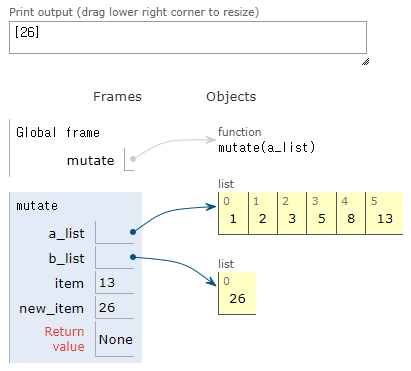
- Debugging Tip 2 ********* 매우 중요!!!
7. 휴식을 취한다. 아무리 붙든다고 해결되지 않는다.
8. 친구를 사귄다. - 내가 아닌 남이 코드를 봐준다.
9. Run Often: 작은 단위로 나누어 실행을 자주한다. (Error를 한번에 해결하는 것보다 하나씩 해결하는게 나음)
10. StackOverflow: https://stackoverflow.com/ (Error를 질문하면 전문가가 답변하는 site - but, 너무 의존하지 마라)

1) Original - Error 많음

In [ ]:
# Describe Problem
def my_function():
  for i in range(1, 20):
    if i == 20:
      print("You got it")
my_function()

# Reproduce the Bug
from random import randint
dice_imgs = ["❶", "❷", "❸", "❹", "❺", "❻"]
dice_num = randint(1, 6)
print(dice_imgs[dice_num])

# Play Computer
year = int(input("What's your year of birth?"))
if year > 1980 and year < 1994:
  print("You are a millenial.")
elif year > 1994:
  print("You are a Gen Z.")

# Fix the Errors
age = input("How old are you?")
if age > 18:
print("You can drive at age {age}.")

#Print is Your Friend
pages = 0
word_per_page = 0
pages = int(input("Number of pages: "))
word_per_page == int(input("Number of words per page: "))
total_words = pages * word_per_page
print(total_words)

#Use a Debugger
def mutate(a_list):
  b_list = []
  for item in a_list:
    new_item = item * 2
  b_list.append(new_item)
  print(b_list)

mutate([1,2,3,5,8,13])

2) Fixed

In [33]:
# Describe Problem
def my_function():
    for i in range(1, 21): # range에서 최댓값은 포함되지 않음
        if i == 20:
            print("You got it")
my_function()

# Reproduce the Bug
from random import randint
dice_imgs = ["❶", "❷", "❸", "❹", "❺", "❻"]
dice_num = randint(0,5) # list는 index 값이'1'이 아닌 '0'부터 시작 and 만일 '6'이 나오면 Error 발생
print(dice_imgs[dice_num])

# Play Computer
year = int(input("What's your year of birth?"))
if year > 1980 and year < 1994:
    print("You are a millenial.")
elif year >= 1994: # 1994년생은 포함하지 않음
    print("You are a Gen Z.")
else:
    print("You lived over 40 years.") # 1980년생 이하는 포함하지 않음

# Fix the Errors
age = int(input("How old are you?")) # only 'input'은 string이기 때문에 수 비교를 위해 int로 바꿔야 함
if age > 18:
    print(f"You can drive at age {age}.") # indent X (Error) + f를 붙이지 않음
else:
    print("You can't drive.") # 18살 이하 사람의 출력값이 없음

#Print is Your Friend
pages = 0
word_per_page = 0
pages = int(input("Number of pages: "))
word_per_page = int(input("Number of words per page: ")) # if, while, for이 아닌 이상 등호는 '=='이 아닌 '='이어야 발현
total_words = pages * word_per_page
print(total_words)
# '=='는 check로 같음을 비교하는 의미: checker
# '='는 값을 할당함을 의미

#Use a Debugger
def mutate(a_list):
    b_list = []
    for item in a_list:
        new_item = item * 2
        b_list.append(new_item) # 각각의 요소를 list에 넣기 위해서는 indent를 한번 더 넣어 for loop 안에 속하게 해야 한다.
    print(b_list)
mutate([1,2,3,5,8,13])

You got it
❷
What's your year of birth?1998
You are a Gen Z.
How old are you?24
You can drive at age 24.
Number of pages: 120
Number of words per page: 45
5400
[2, 4, 6, 10, 16, 26]


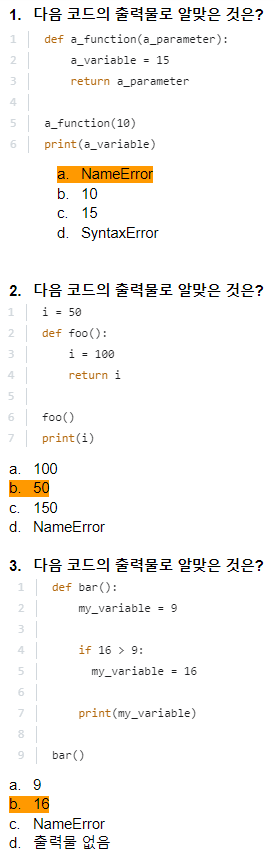

1) original

In [ ]:
# 홀수짝수
number = int(input("Which number do you want to check?"))
if number % 2 = 0:
  print("This is an even number.")
else:
  print("This is an odd number.")
  
# 윤년계산기
year = input("Which year do you want to check?")
if year % 4 == 0:
  if year % 100 == 0:
    if year % 400 == 0:
      print("Leap year.")
    else:
      print("Not leap year.")
  else:
    print("Leap year.")
else:
  print("Not leap year.")

#FizzBuzz
for number in range(1, 101):
  if number % 3 == 0 or number % 5 == 0:
    print("FizzBuzz")
  if number % 3 == 0:
    print("Fizz")
  if number % 5 == 0:
    print("Buzz")
  else:
    print([number])

2) Fixed

In [42]:
# 홀수짝수
number = int(input("Which number do you want to check?"))
if number % 2 == 0: # '='는 checker가 아니라 할당함을 의미하기 때문에 checker인 '=='로 변환
  print("This is an even number.")
else:
  print("This is an odd number.")
print()

# 윤년계산기
year = int(input("Which year do you want to check?")) # str인 input을 정수(int)로 변환하지 않음
if year % 4 == 0:
  if year % 100 == 0:
    if year % 400 == 0:
      print("Leap year.")
    else:
      print("Not leap year.")
  else:
    print("Leap year.")
else:
  print("Not leap year.")
print()

#FizzBuzz
for number in range(1, 101):
  if number % 3 == 0 and number % 5 == 0: # 'or'은 둘 중에 하나를 의미하기 때문에 'and로 교체'
    print("FizzBuzz")
  elif number % 3 == 0: # 만일 'if'로 두면 위에서 끝난 실행이 아래에서 새롭게 실행됨. 위에서 끝나면 끝임을 보이기 위해 elif 사용.
    print("Fizz")
  elif number % 5 == 0: # 만일 'if'로 두면 위에서 끝난 실행이 아래에서 새롭게 실행됨. 위에서 끝나면 끝임을 보이기 위해 elif 사용.
    print("Buzz")
  else:
    print(number) # 쓸데없이 list로 만들지 말고 그냥 산출해야 함

Which number do you want to check?5623
This is an odd number.

Which year do you want to check?2021
Not leap year.

1
2
Fizz
4
Buzz
Fizz
7
8
Fizz
Buzz
11
Fizz
13
14
FizzBuzz
16
17
Fizz
19
Buzz
Fizz
22
23
Fizz
Buzz
26
Fizz
28
29
FizzBuzz
31
32
Fizz
34
Buzz
Fizz
37
38
Fizz
Buzz
41
Fizz
43
44
FizzBuzz
46
47
Fizz
49
Buzz
Fizz
52
53
Fizz
Buzz
56
Fizz
58
59
FizzBuzz
61
62
Fizz
64
Buzz
Fizz
67
68
Fizz
Buzz
71
Fizz
73
74
FizzBuzz
76
77
Fizz
79
Buzz
Fizz
82
83
Fizz
Buzz
86
Fizz
88
89
FizzBuzz
91
92
Fizz
94
Buzz
Fizz
97
98
Fizz
Buzz
